In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('HR data.xlsx')

In [3]:
df.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [5]:
#check null values
df.isnull().sum()

Attrition                     0
Business Travel               0
CF_age band                   0
CF_attrition label            0
Department                    0
Education Field               0
emp no                        0
Employee Number               0
Gender                        0
Job Role                      0
Marital Status                0
Over Time                     0
Over18                        0
Training Times Last Year      0
0                             0
0.1                           0
Age                           0
CF_current Employee           0
Daily Rate                    0
Distance From Home            0
Education                     0
Employee Count                0
Environment Satisfaction      0
Hourly Rate                   0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income                0
Monthly Rate                  0
Num Companies Worked          0
Percent Salary Hike           0
Performa

In [6]:
#check duplicate values
df.duplicated().sum()

0

In [7]:
# Rename the CF_age band column to Age Band.
df.rename(columns={'CF_age band':'Age Band'}, inplace=True)

In [8]:
# Add a new column Years Since Promo on which is the difference between Years At Company and Years Since Last Promotion. 
df['Years since promotion'] = df['Years At Company'] - df['Years Since Last Promotion']

# Descriptive Analysis

In [9]:
df.describe()

,Employee Number,Training Times Last Year,0,0.1,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Years since promotion
count,1470.000000,1470.000000,1470.0,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1024.865306,2.799320,-2.0,0.0,36.923810,0.838776,802.485714,9.192517,1.0,2.721769,...,2.712245,80.0,0.793878,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,4.820408
std,602.024335,1.289271,0.0,0.0,9.135373,0.367863,403.509100,8.106864,0.0,1.093082,...,1.081209,0.0,0.852077,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,4.847756
min,1.000000,0.000000,-2.0,0.0,18.000000,0.000000,102.000000,1.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,491.250000,2.000000,-2.0,0.0,30.000000,1.000000,465.000000,2.000000,1.0,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000
50%,1020.500000,3.000000,-2.0,0.0,36.000000,1.000000,802.000000,7.000000,1.0,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,4.000000
75%,1555.750000,3.000000,-2.0,0.0,43.000000,1.000000,1157.000000,14.000000,1.0,4.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,7.000000
max,2068.000000,6.000000,-2.0,0.0,60.000000,1.000000,1499.000000,29.000000,1.0,4.000000,...,4.000000,80.0,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000,36.000000


In [10]:
df.describe(include=['object'])

,Attrition,Business Travel,Age Band,CF_attrition label,Department,Education Field,emp no,Gender,Job Role,Marital Status,Over Time,Over18,Education
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,5,2,3,6,1470,2,9,3,2,1,5
top,No,Travel_Rarely,25 - 34,Current Employees,R&D,Life Sciences,STAFF-1,Male,Sales Executive,Married,No,Y,Bachelor's Degree
freq,1233,1043,554,1233,961,606,1,882,326,673,1054,1470,572


In [11]:
df.groupby('Attrition').describe()

Employee Number                                               \
                    count         mean         std  min    25%     50%   
Attrition                                                                
No                 1233.0  1027.656123  606.217074  2.0  483.0  1022.0   
Yes                 237.0  1010.345992  580.750572  1.0  514.0  1017.0   

                          Training Times Last Year            ...  \
              75%     max                    count      mean  ...   
Attrition                                                     ...   
No         1574.0  2068.0                   1233.0  2.832928  ...   
Yes        1486.0  2055.0                    237.0  2.624473  ...   

          Years With Curr Manager       Years since promotion            \
                              75%   max                 count      mean   
Attrition                                                                 
No                            7.0  17.0                1233.0  5.134631   
Yes                           5.0  14.0                 237.0  3.185654   

                                               
                std  min  25%  50%  75%   max  
Attrition                                      
No         4.875366  0.0  1.0  4.0  7.0  36.0  
Yes        4.358817  0.0  1.0  2.0  4.0  32.0  

[2 rows x 232 columns]

In [12]:
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].unique()}")

Attrition: ['Yes' 'No']
Business Travel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Age Band: ['35 - 44' '45 - 54' '25 - 34' 'Over 55' 'Under 25']
CF_attrition label: ['Ex-Employees' 'Current Employees']
Department: ['Sales' 'R&D' 'HR']
Education Field: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
emp no: ['STAFF-1' 'STAFF-2' 'STAFF-4' ... 'STAFF-1667' 'STAFF-1878' 'STAFF-1702']
Gender: ['Female' 'Male']
Job Role: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Marital Status: ['Single' 'Married' 'Divorced']
Over Time: ['Yes' 'No']
Over18: ['Y']
Education: ['Associates Degree' 'High School' "Master's Degree" "Bachelor's Degree"
 'Doctoral Degree']


In [13]:
## Frequencies of different categories (categorical values)

In [14]:
# frequency of employees in each department
df['Department'].value_counts()

Department
R&D      961
Sales    446
HR        63
Name: count, dtype: int64

In [15]:
# Number of Male & Female Employees
df.groupby('Gender')['Employee Count'].count()

Gender
Female    588
Male      882
Name: Employee Count, dtype: int64

In [16]:
# Find out the details about Marital status. 
df['Marital Status'].value_counts()

Marital Status
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [17]:
# frequency of attrition 
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [18]:
# Group the data by Department and calculate the average Monthly Income
group1 = df.groupby('Department')['Monthly Income'].mean()
print(group1)

Department
HR       6654.507937
R&D      6281.252862
Sales    6959.172646
Name: Monthly Income, dtype: float64


In [19]:
# Avg Monthly income per job role
group2 = df.groupby('Job Role')['Monthly Income'].mean()
print(group2)

Job Role
Healthcare Representative     7528.763359
Human Resources               4235.750000
Laboratory Technician         3237.169884
Manager                      17181.676471
Manufacturing Director        7295.137931
Research Director            16033.550000
Research Scientist            3239.972603
Sales Executive               6924.279141
Sales Representative          2626.000000
Name: Monthly Income, dtype: float64


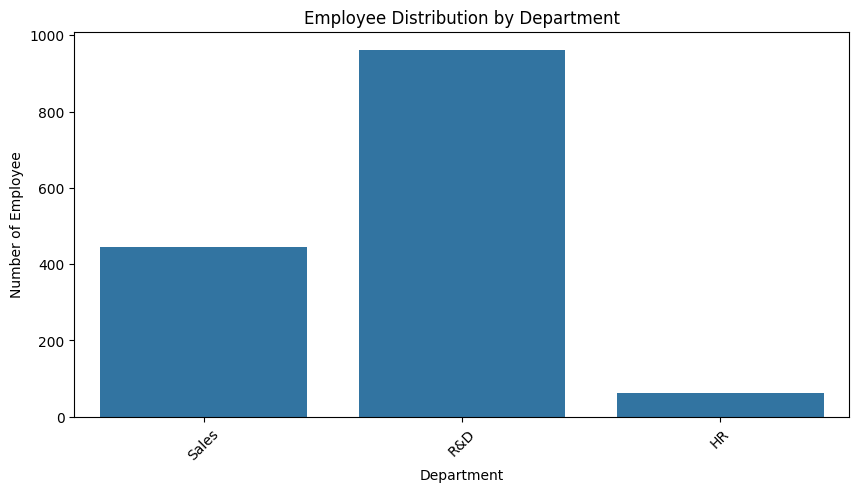

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department', data=df)
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.xticks(rotation=45)
plt.show()

In [21]:
categorical_columns = df.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"\n{column} Distribution:")
    print(df[column].value_counts())


Attrition Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Business Travel Distribution:
Business Travel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Age Band Distribution:
Age Band
25 - 34     554
35 - 44     505
45 - 54     245
Under 25     97
Over 55      69
Name: count, dtype: int64

CF_attrition label Distribution:
CF_attrition label
Current Employees    1233
Ex-Employees          237
Name: count, dtype: int64

Department Distribution:
Department
R&D      961
Sales    446
HR        63
Name: count, dtype: int64

Education Field Distribution:
Education Field
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

emp no Distribution:
emp no
STAFF-1       1
STAFF-1391    1
STAFF-1389    1
STAFF-1387    1
STAFF-1383    1
             ..
STAFF-659     1
STAFF-657     1
STAFF-656     1
ST

## Visualize Distribution

C:\Users\soham\AppData\Local\Temp\ipykernel_14424\2046855439.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Monthly Income'], shade=True, color='green')


Text(0, 0.5, 'Density')

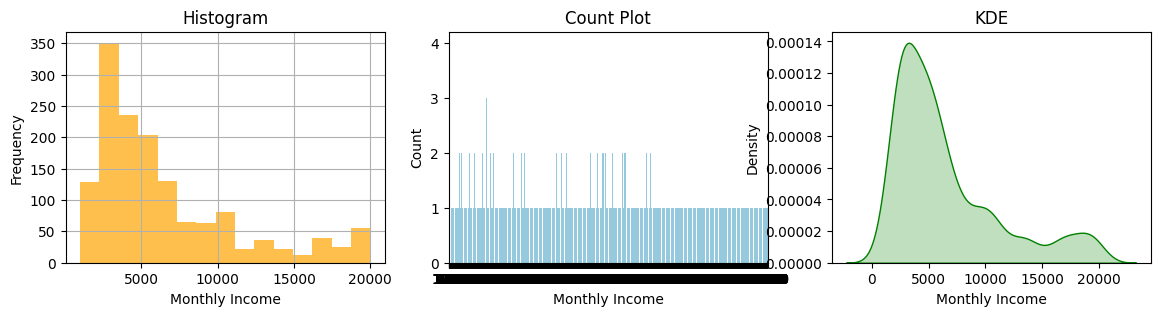

In [22]:
fig,axes= plt.subplots(1,3, figsize=(14,3))

df['Monthly Income'].hist(bins = 15, alpha=0.7, color='orange', ax=axes[0])
axes[0].set_xlabel('Monthly Income')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram')

sns.countplot(x='Monthly Income', data=df, color='skyblue', ax=axes[1])
axes[1].set_title('Count Plot')
axes[1].set_xlabel('Monthly Income')
axes[1].set_ylabel('Count')

sns.kdeplot(df['Monthly Income'], shade=True, color='green')
axes[2].set_title('KDE')
axes[2].set_xlabel('Monthly Income')
axes[2].set_ylabel('Density')

### Bar Chart :- Department Distribution

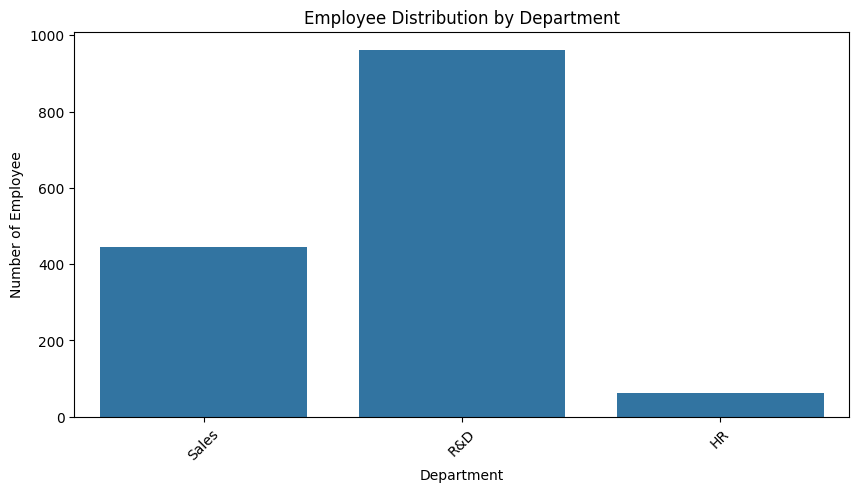

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x='Department', data=df)
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employee')
plt.xticks(rotation=45)
plt.show()

Observations :-
A] DEPARTMENT DISTRIBUTIONS -
1. Uneven Distribution:- We can see uneven distribution of employees across departments.
2. Potential for Resource Allocation:- Valuable information for HR planning and resource allocation. Departments with high no. of employees requires more resources as compared to smaller departments.

### Bar Chart:- Job Role Distribution

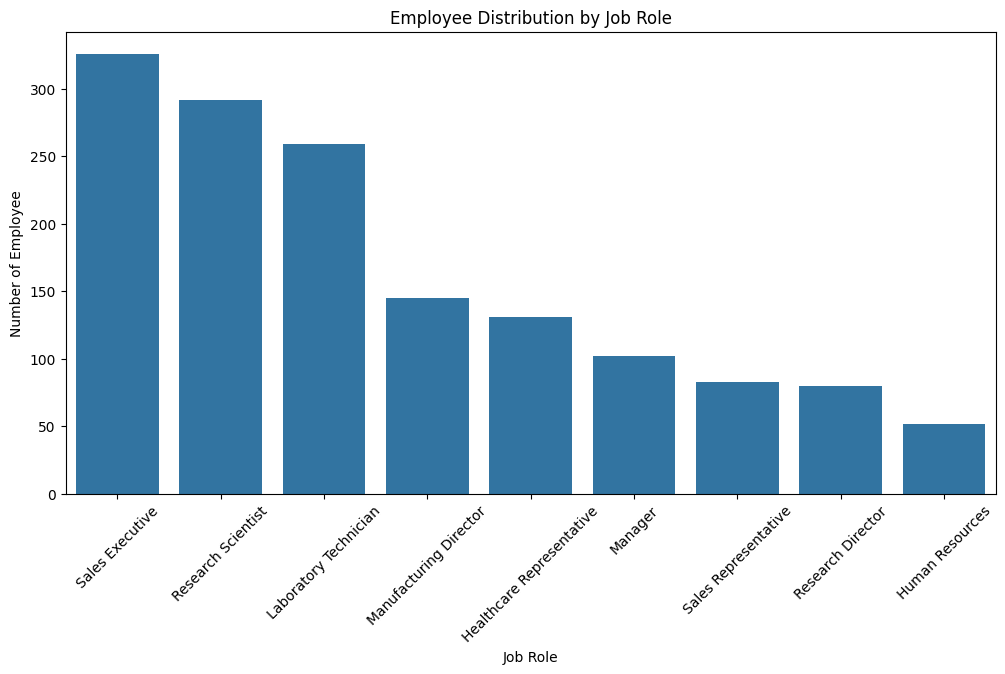

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Job Role', data=df)
plt.title('Employee Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Number of Employee')
plt.xticks(rotation=45)
plt.show()

## Bar Chart: Department-wise Monthly Rates

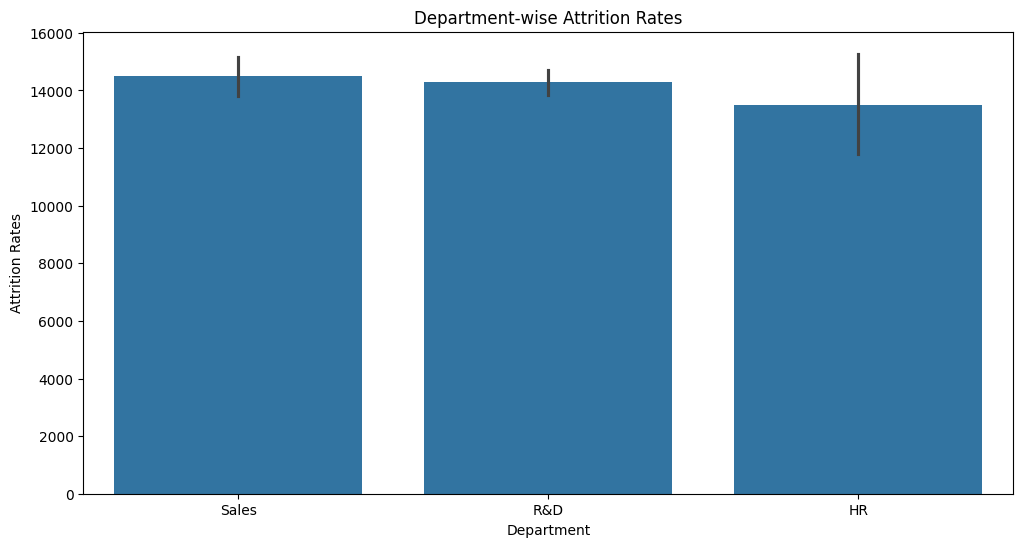

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x='Department', y='Monthly Rate', data=df)  
plt.title('Department-wise Attrition Rates')
plt.xlabel('Department')
plt.ylabel('Attrition Rates')
plt.show()

B] JOB ROLE DISTRIBUTION -
1. Common Roles:- Sales Executive, Research Scientist and Laboratory Technician are the most common roles observed. We can understand the company's organizational structure and identify potential skill gaps of areas for recruitment.
2. Role Diversity:- Can be used to assess the company's ability to attract and retain talent with diverse skills sets.

### Histogram:- Age Distribution

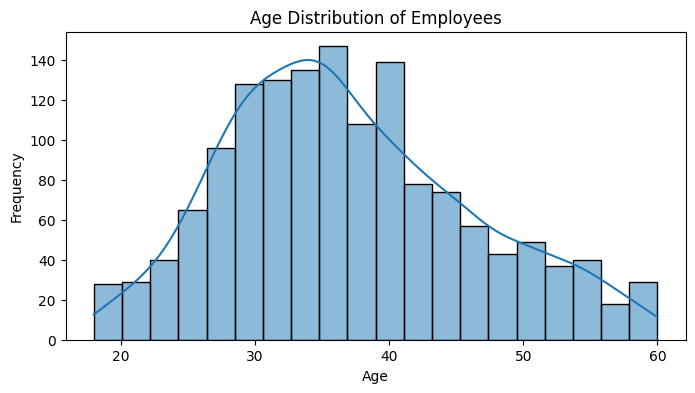

In [26]:

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C] AGE DISTRIBUTION -
1. Age Demographics:- 28-38 yrs old employees have the higest density. More young workforce can be recruited.
2. Generational Diversity:- Classifies presence of different generations in the workforce. This info. can help us to understand the
   needs and preferences of different group of employees.

### Histogram:- Salary Distribution

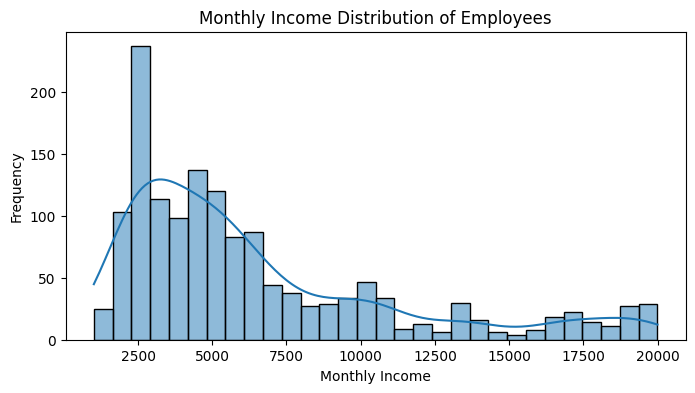

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Monthly Income'], bins=30, kde=True)
plt.title('Monthly Income Distribution of Employees')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

## Histogram:- Satisfaction level Distribution

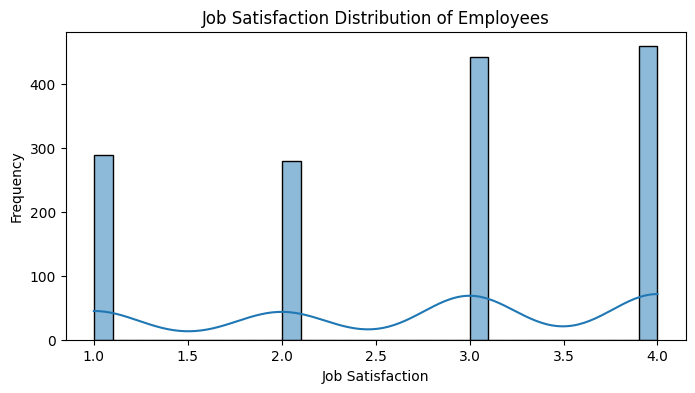

In [28]:
plt.figure(figsize=(8,4))
sns.histplot(df['Job Satisfaction'], bins=30, kde=True)
plt.title('Job Satisfaction Distribution of Employees')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()

## Box Plot: Salary variations across job roles

C:\Users\soham\AppData\Local\Temp\ipykernel_14424\4066548902.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Job Role', y='Monthly Income', data=df, palette='viridis')


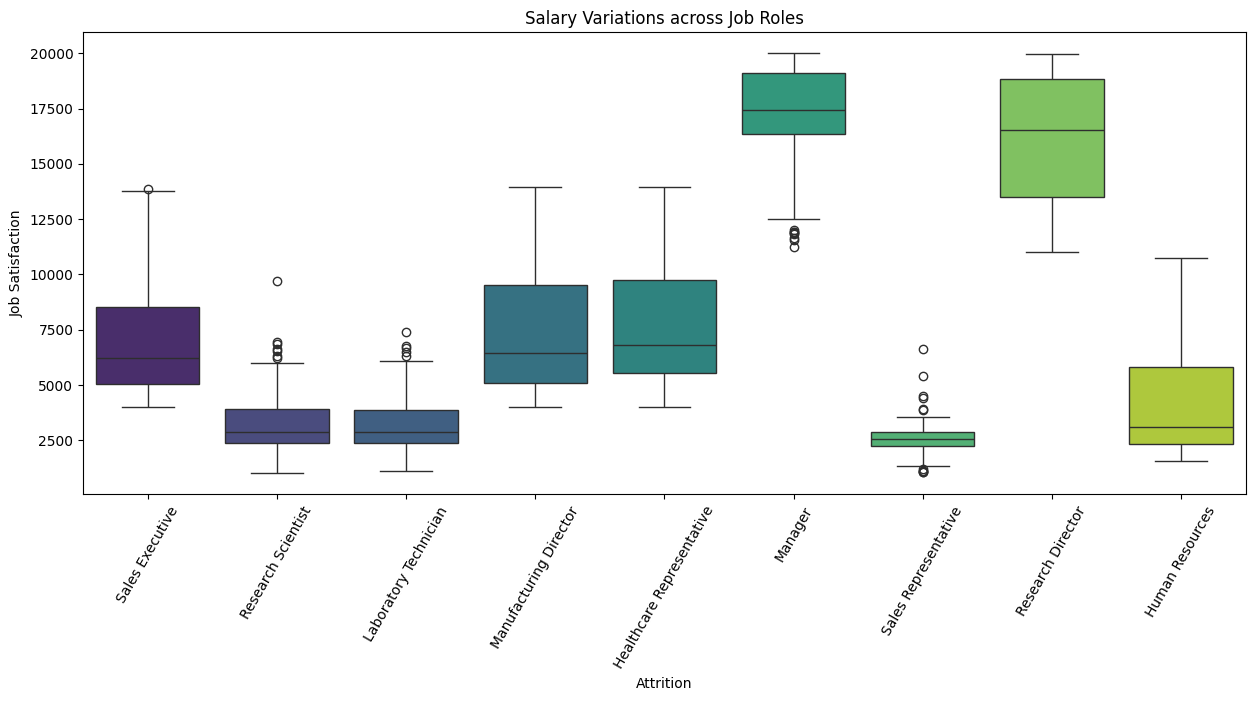

In [29]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Job Role', y='Monthly Income', data=df, palette='viridis')
plt.title('Salary Variations across Job Roles')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=60)
plt.show()

## Line Plot:- Trends in Performance rating over time

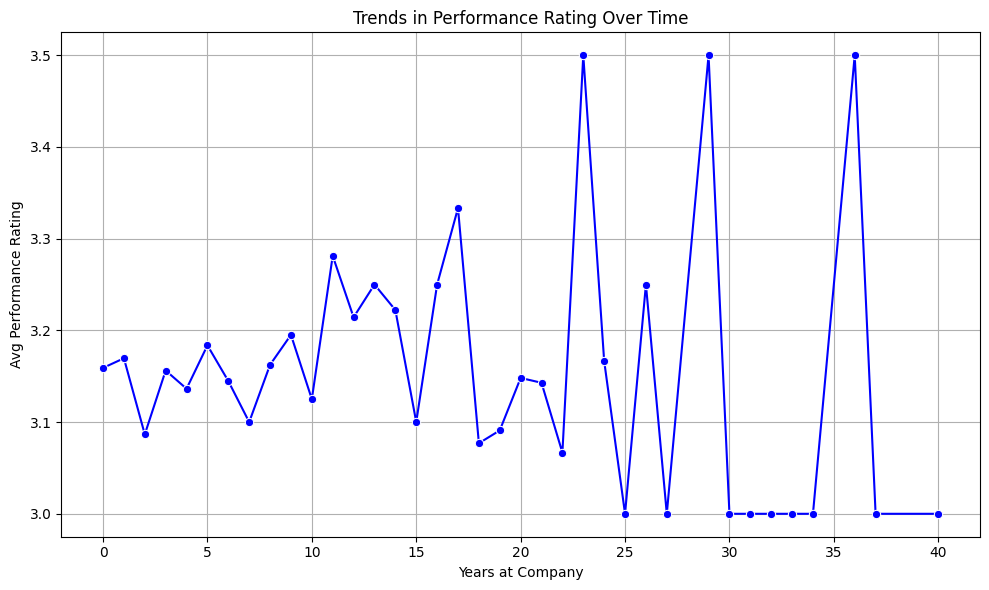

In [30]:
performance = df.groupby('Years At Company')['Performance Rating'].mean()

#lineplot
plt.figure(figsize=(10,6))
sns.lineplot(x=performance.index, y=performance.values, marker='o', color='blue')
plt.title('Trends in Performance Rating Over Time')
plt.xlabel('Years at Company')
plt.ylabel('Avg Performance Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

D] Salary Distribution -
1. Range and Spread:- Monthly Salary Ranges from apprx. 1200 - 20000. Monthly income starts to dilute nearly from 6000. 2000-6000 has the maximum number of employees.
2. Outliers:- It is observed that salary distribution is densed in low amount and sparse in high payable amount.

## Correlation Analysis

In [31]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
correlation_matrix

,Employee Number,Training Times Last Year,0,0.1,Age,CF_current Employee,Daily Rate,Distance From Home,Employee Count,Environment Satisfaction,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Years since promotion
Employee Number,1.000000,0.023603,NaN,NaN,-0.010145,0.010577,-0.050990,0.032916,NaN,0.017621,...,-0.069861,NaN,0.062227,-0.014365,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,-0.008210
Training Times Last Year,0.023603,1.000000,NaN,NaN,-0.019621,0.059478,0.002453,-0.036942,NaN,-0.019359,...,0.002497,NaN,0.011274,-0.035662,0.028072,0.003569,-0.005738,-0.002067,-0.004096,0.005884
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.010145,-0.019621,NaN,NaN,1.000000,0.159205,0.010661,-0.001686,NaN,0.010146,...,0.053535,NaN,0.037510,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089,0.249505
CF_current Employee,0.010577,0.059478,NaN,NaN,0.159205,1.000000,0.056652,-0.077924,NaN,0.103369,...,0.045872,NaN,0.137145,0.171063,0.063939,0.134392,0.160545,0.033019,0.156199,0.147895
Daily Rate,-0.050990,0.002453,NaN,NaN,0.010661,0.056652,1.000000,-0.004985,NaN,0.018355,...,0.007846,NaN,0.042143,0.014515,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.020950
Distance From Home,0.032916,-0.036942,NaN,NaN,-0.001686,-0.077924,-0.004985,1.000000,NaN,-0.016075,...,0.006557,NaN,0.044872,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406,0.005349
Employee Count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Environment Satisfaction,0.017621,-0.019359,NaN,NaN,0.010146,0.103369,0.018355,-0.016075,NaN,1.000000,...,0.007665,NaN,0.003432,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.008922


### Visualizing Correlation Matrix with seaborn

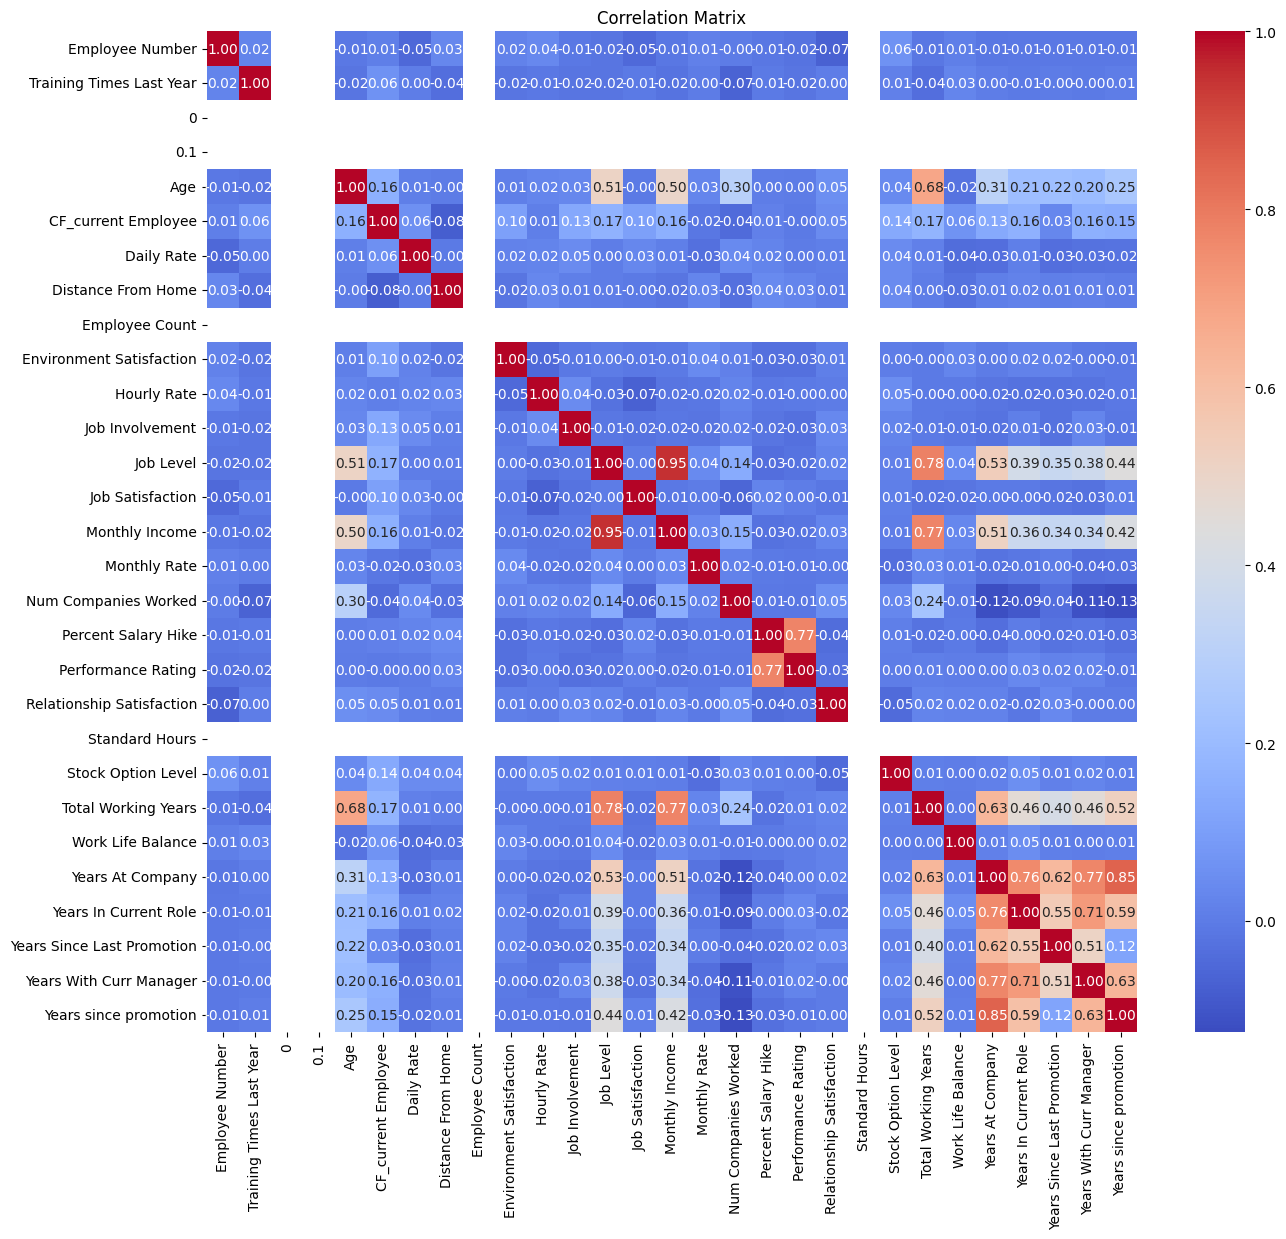

In [32]:
plt.figure(figsize=(15,13))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Attrition Analysis


In [33]:
# Convert the Attriton column from object to numeric. 
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [34]:
# Segment data based on attrition status
retained_employees = df[df['Attrition'] == 0].groupby('Department').size()
attrited_employees = df[df['Attrition'] == 1].groupby('Department').size()


In [35]:
df.groupby(['Gender', 'Attrition']).count()

Business Travel  Age Band  CF_attrition label  Department  \
Gender Attrition                                                              
Female 0                      501       501                 501         501   
       1                       87        87                  87          87   
Male   0                      732       732                 732         732   
       1                      150       150                 150         150   

                  Education Field  emp no  Employee Number  Job Role  \
Gender Attrition                                                       
Female 0                      501     501              501       501   
       1                       87      87               87        87   
Male   0                      732     732              732       732   
       1                      150     150              150       150   

                  Marital Status  Over Time  ...  Relationship Satisfaction  \
Gender Attrition                             ...                              
Female 0                     501        501  ...                        501   
       1                      87         87  ...                         87   
Male   0                     732        732  ...                        732   
       1                     150        150  ...                        150   

                  Standard Hours  Stock Option Level  Total Working Years  \
Gender Attrition                                                            
Female 0                     501                 501                  501   
       1                      87                  87                   87   
Male   0                     732                 732                  732   
       1                     150                 150                  150   

                  Work Life Balance  Years At Company  Years In Current Role  \
Gender Attrition                                                               
Female 0                        501               501                    501   
       1                         87                87                     87   
Male   0                        732               732                    732   
       1                        150               150                    150   

                  Years Since Last Promotion  Years With Curr Manager  \
Gender Attrition                                                        
Female 0                                 501                      501   
       1                                  87                       87   
Male   0                                 732                      732   
       1                                 150                      150   

                  Years since promotion  
Gender Attrition                         
Female 0                            501  
       1                             87  
Male   0                            732  
       1                            150  

[4 rows x 40 columns]

In [36]:
df.groupby(['Gender', 'Attrition'])['Employee Count'].count().unstack()

Attrition,0,1
Gender,,
Female,501,87
Male,732,150


In [37]:
df.groupby(['Age', 'Attrition'])['Employee Count'].count().unstack()

Attrition,0,1
Age,,
18,4.0,4.0
19,3.0,6.0
20,5.0,6.0
21,7.0,6.0
22,11.0,5.0
23,10.0,4.0
24,19.0,7.0
25,20.0,6.0
26,27.0,12.0


C:\Users\soham\AppData\Local\Temp\ipykernel_14424\488526202.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=retained_employees.index, y=retained_employees.values, palette='Greens_r')
C:\Users\soham\AppData\Local\Temp\ipykernel_14424\488526202.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrited_employees.index, y=attrited_employees.values, palette='Reds_r')


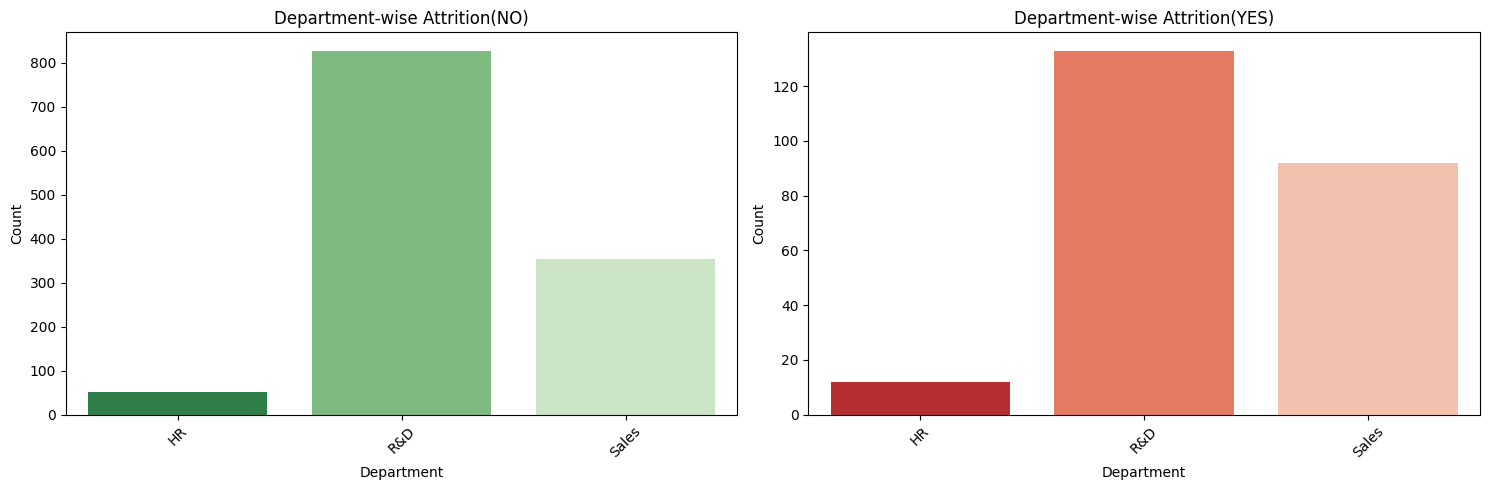

In [38]:

fig = plt.figure(figsize=(15,5))

x1 = fig.add_subplot(121)
sns.barplot(x=retained_employees.index, y=retained_employees.values, palette='Greens_r')
plt.title('Department-wise Attrition(NO)')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

x2 = fig.add_subplot(122)
sns.barplot(x=attrited_employees.index, y=attrited_employees.values, palette='Reds_r')
plt.title('Department-wise Attrition(YES)')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()



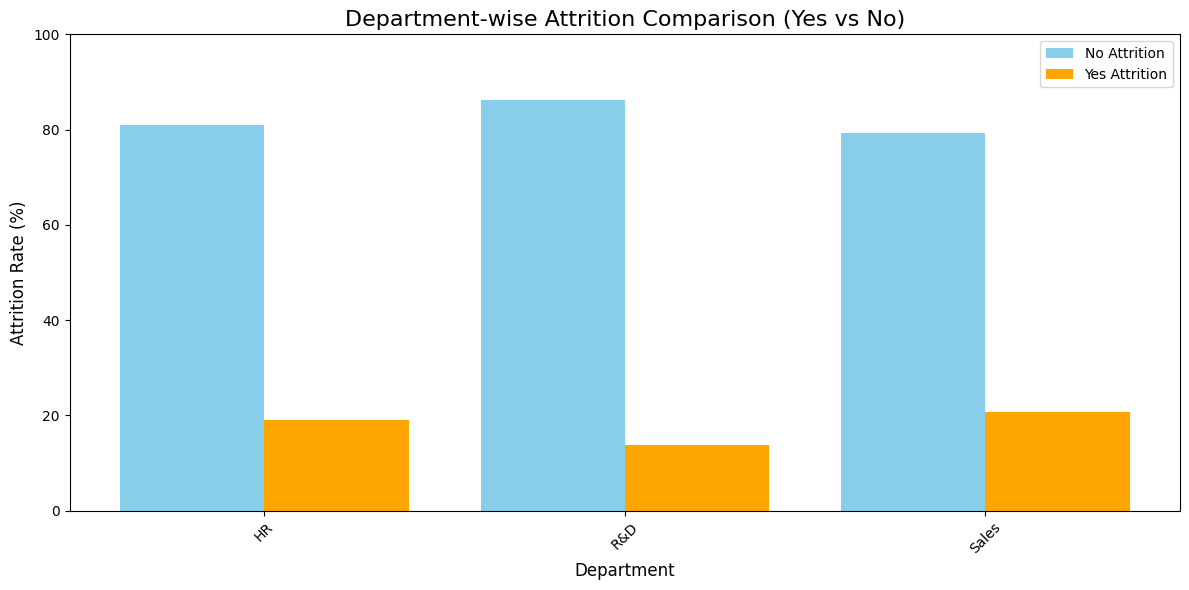

In [39]:
# Group data by 'Department' and 'Attrition', calculate counts
department_attrition_counts = df.groupby(['Department', 'Attrition']).size().unstack()

# Normalize to calculate rates (percentage of 'Yes' and 'No' for each department)
department_attrition_rates = department_attrition_counts.div(department_attrition_counts.sum(axis=1), axis=0) * 100

# Reset index for plotting
department_attrition_rates = department_attrition_rates.reset_index()

# Plotting a grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.4
x = range(len(department_attrition_rates['Department']))

# Plot 'No' attrition rates
plt.bar(
    [p - bar_width / 2 for p in x], 
    department_attrition_rates[0], 
    width=bar_width, 
    label='No Attrition', 
    color='skyblue'
)

# Plot 'Yes' attrition rates
plt.bar(
    [p + bar_width / 2 for p in x], 
    department_attrition_rates[1], 
    width=bar_width, 
    label='Yes Attrition', 
    color='orange'
)

# Add chart details
plt.title('Department-wise Attrition Comparison (Yes vs No)', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate (%)', fontsize=12)
plt.xticks(ticks=x, labels=department_attrition_rates['Department'], rotation=45)
plt.legend()
plt.ylim(0, 100)

# Show the bar chart
plt.tight_layout()
plt.show()


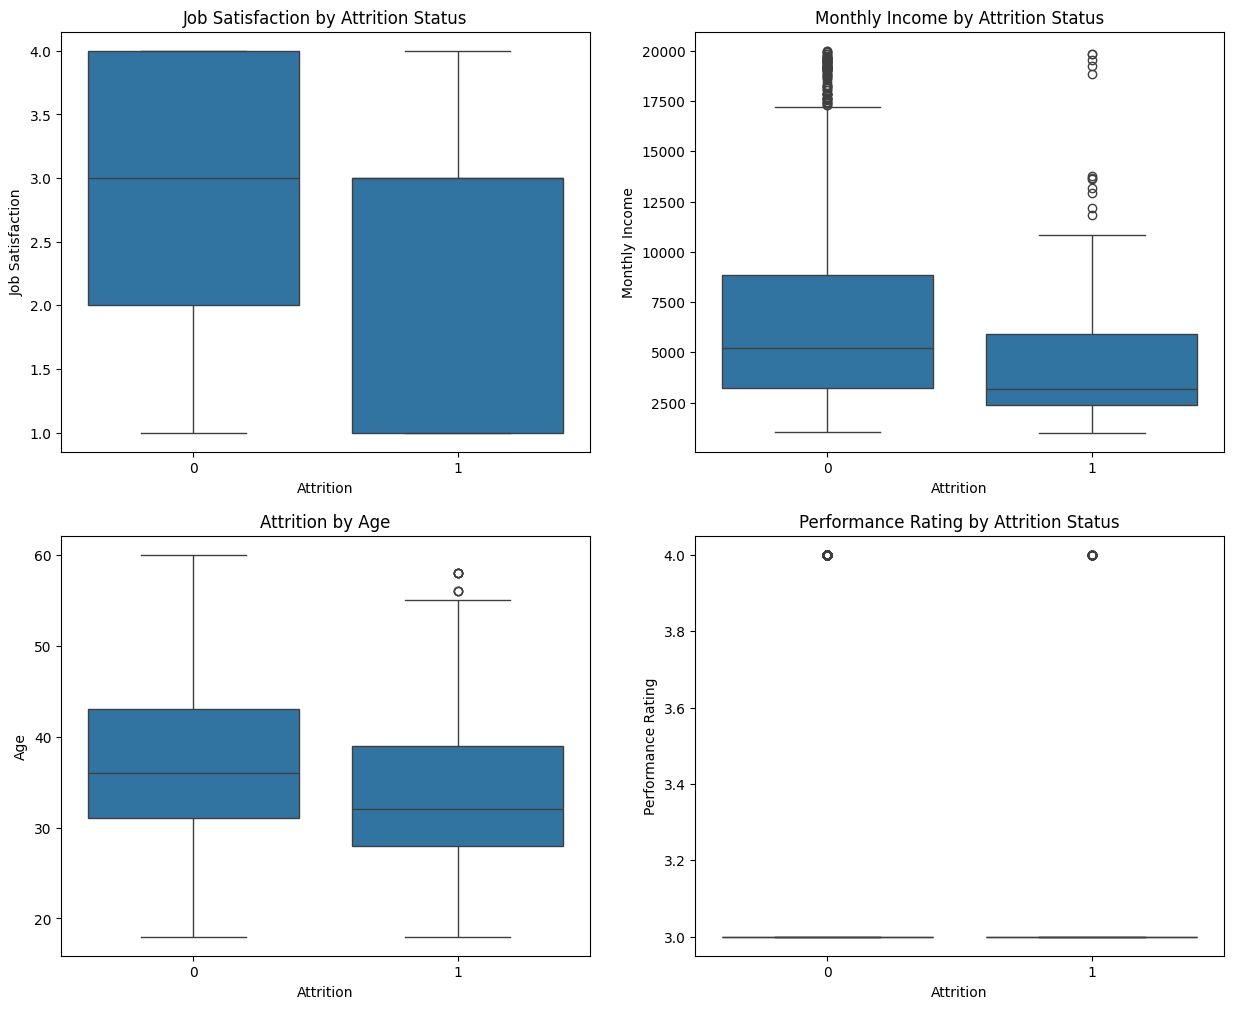

In [40]:
# Comparing satisfaction level
fig = plt.figure(figsize=(15, 12))

x1 = fig.add_subplot(221)
sns.boxplot(x='Attrition', y='Job Satisfaction', data=df)
plt.title('Job Satisfaction by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')

x2 = fig.add_subplot(222)
sns.boxplot(x='Attrition', y='Monthly Income', data=df)
plt.title('Monthly Income by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Monthly Income')

x3 = fig.add_subplot(223)
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Attrition by Age')
plt.xlabel('Attrition')
plt.ylabel('Age')

x4 = fig.add_subplot(224)
sns.boxplot(x='Attrition', y='Performance Rating', data=df)
plt.title('Performance Rating by Attrition Status')
plt.xlabel('Attrition')
plt.ylabel('Performance Rating')
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_14424\2810392928.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette='Set2')
C:\Users\soham\AppData\Local\Temp\ipykernel_14424\2810392928.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Job Role', data=df, palette='Set3')


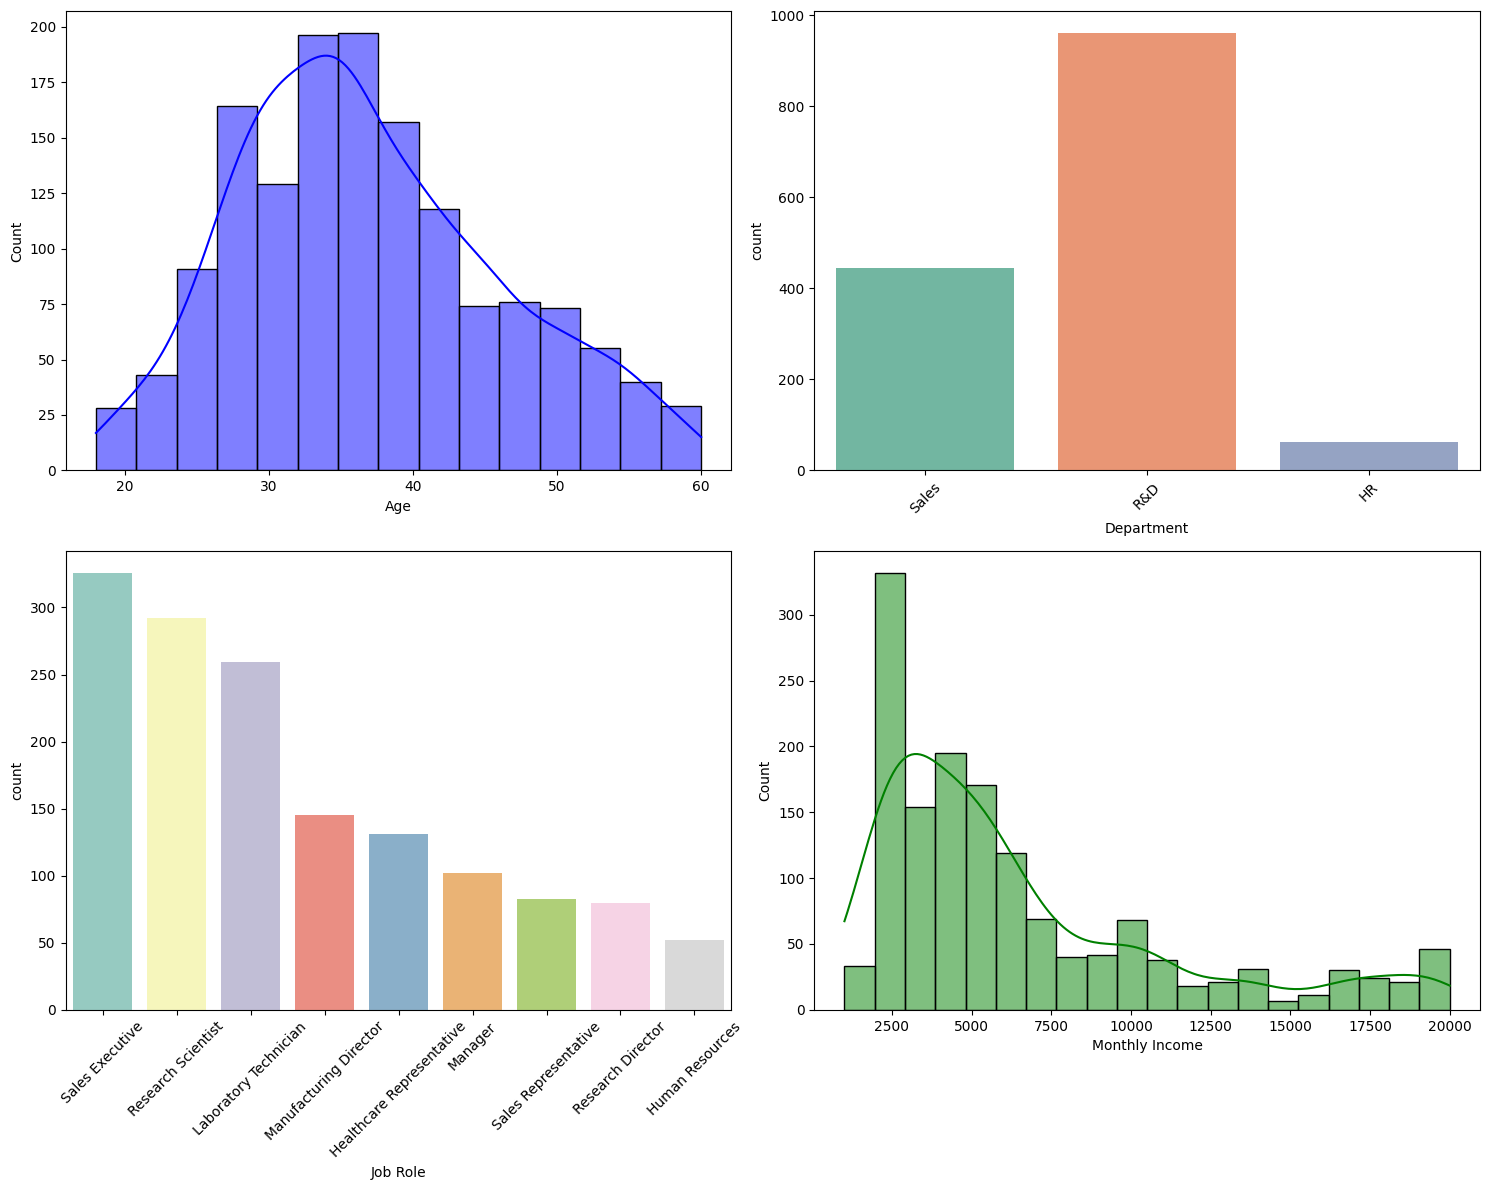

In [41]:
fig = plt.figure(figsize=(15,12))

# Age Distribution
x1 = fig.add_subplot(221)
sns.histplot(df['Age'], kde=True, color='blue', bins=15)
plt.tight_layout()


# Department Distribution
x2 = fig.add_subplot(222)
sns.countplot(x='Department', data=df, palette='Set2')
plt.xticks(rotation=45)
plt.tight_layout()

# Job Role Distribution
x3 = fig.add_subplot(223)
sns.countplot(x='Job Role', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.tight_layout()

# Salary Distribution
x3 = fig.add_subplot(224)
sns.histplot(df['Monthly Income'], kde=True, color='green', bins=20)
plt.tight_layout()

plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_14424\988386651.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='Age Band', y='Monthly Rate', data=df.groupby('Age Band')['Attrition'].mean().reset_index().rename(columns={'Attrition': 'Monthly Rate'}))


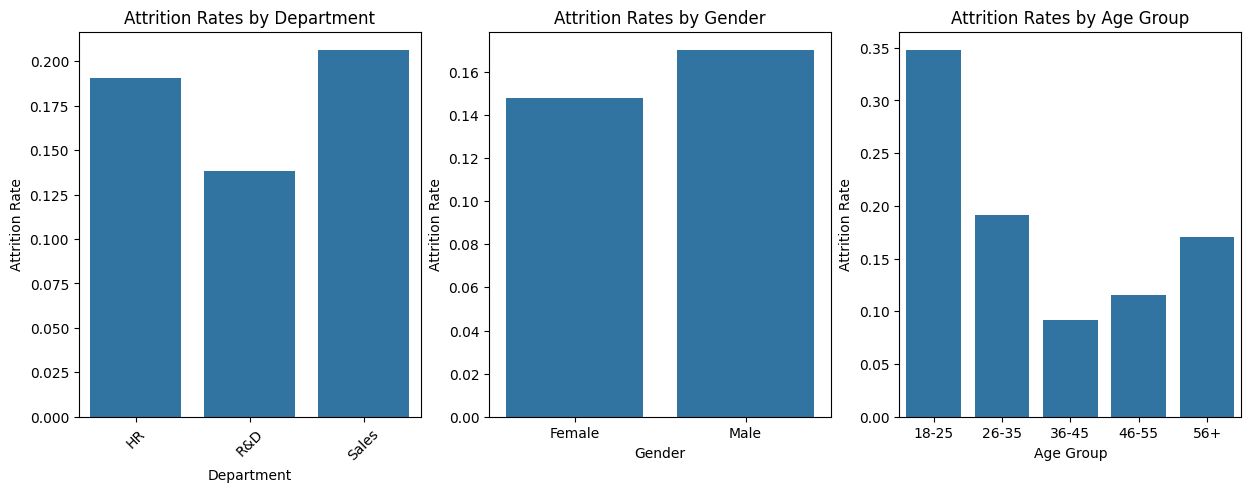

In [42]:
# Trends in attrition rates across demographics
fig = plt.figure(figsize=(15,5))
# Attrition rates by department

x1 = fig.add_subplot(131)
sns.barplot(x='Department', y='Monthly Rate', data=df.groupby('Department')['Attrition'].mean().reset_index().rename(columns={'Attrition': 'Monthly Rate'}))
plt.title('Attrition Rates by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)


# Attrition rates by gender
x2 = fig.add_subplot(132)
sns.barplot(x='Gender', y='Monthly Rate', data=df.groupby('Gender')['Attrition'].mean().reset_index().rename(columns={'Attrition': 'Monthly Rate'}))
plt.title('Attrition Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')

# Attrition rates by age group 
df['Age Band'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56+'])
x3 = fig.add_subplot(133)
sns.barplot(x='Age Band', y='Monthly Rate', data=df.groupby('Age Band')['Attrition'].mean().reset_index().rename(columns={'Attrition': 'Monthly Rate'}))
plt.title('Attrition Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate')
plt.show()

# Recommendations

## Enhance Employee Satisfaction:
### a) Identify & Address Job Dissatisfaction -
1. Focus on high attrition departments.                                                                                     
2. Address low job satisfaction :-
(a) Regular Feedback mechanisms , 
(b) Employee recognition Programs , 
(c) Career development opportunities , 
(d) Flexible work arrangements
### b)Improve Work-Life Balance -
1. Stress Management Programs
2. Promote Healthy lifestyles

## Reduce Turnover Rates
### a) Address Compensation
1. Review and adjust compensation
2. Enhance Benefits packages
### b) Improve Onboarding & Training
1. Streamlined onboarding process
2. Comprehensive trainig programs
### c) Foster a Positive Work Environment
1. Promote Teamwork & Collaboration
2. Address workplace issues propmptly
3. Create a culture of inclusion & diversity

## Optimize Hiring and Retention Strategies
### a) Target Recruitment
1. Identify ideal candidate profile
2. Utilize effective recruitment channels
### b) Effective Interview Processes
1. Conduct thorough interviews
2. Use multiple interview rounds
### c) Proactive Retention Effors
1. Regularly monitor employee engagement
2. Implement retention programs
3. Offer career development opportunities